# Make your own forcing data from ERA5

Introduction: There are lots of forcing data can be used to drive the model, such as ERA5, NCEP (https://psl.noaa.gov/data/gridded/data.ncep.reanalysis.html), etc. Here, we recommend ERA5 to make your own single point forcing as the NCEP and others are too big to download. The ERA5 data can be obtained in a small scale, which usually light weight to download and store.

### Download the required variables from the cdsapi

First, we will use the `cdsapi` package to download the data. If you don't have the package installed, you can install it using the following command:

```
pip install cdsapi

cat <<EOF > ~/.cdsapirc
url: {api-url}
key: {uid}:{api-key}
EOF 
```

[How to get your CDS API?](https://cds.climate.copernicus.eu/api-how-to)

**note: it will take a long time to run this script, so you can run it in the background and check the output file later.**

We also can use the interface to download the data. The code below is an example of how to download the data using the interface.

ref: https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=form

In [1]:
from pyclmuapp import get_forcing
lat=51.5
lon=0.12
zbot=30
start_year=2012
end_year=2012
start_month=1
end_month=2
get_forcing(
    lat=lat, lon=lon, zbot=zbot, 
    start_year=start_year, end_year=end_year, 
    start_month=start_month, end_month=end_month,
    source='cds')

2024-06-27 12:00:16,424 INFO Welcome to the CDS
2024-06-27 12:00:16,424 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


download: ./era5_data/era5_single_2012_01_51.5_0.12.nc


2024-06-27 12:00:16,539 INFO Request is completed
2024-06-27 12:00:16,541 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data4/adaptor.mars.internal-1719485113.5101933-9971-11-4b2c9802-6dcb-4b24-9e4a-2705adec9046.nc to ./era5_data/era5_single_2012_01_51.5_0.12.nc (123.8K)
2024-06-27 12:00:16,865 INFO Download rate 382.4K/s
2024-06-27 12:00:17,862 INFO Welcome to the CDS
2024-06-27 12:00:17,862 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-06-27 12:00:17,958 INFO Request is completed
2024-06-27 12:00:17,958 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data8/adaptor.mars.internal-1719485668.0006976-4897-15-6013a414-d43b-4ed3-820a-8cdfd184bfe1.nc to ./era5_data/era5_single_2012_02_51.5_0.12.nc (116K)


download: ./era5_data/era5_single_2012_02_51.5_0.12.nc


2024-06-27 12:00:18,261 INFO Download rate 382.6K/s


'/Users/user/Documents/GitHub/pyclmuapp/era5_data/era5_forcing_51.5_0.12_30_2012_1_2012_2.nc'

### command line
this is same as above

In [2]:
! pyclmuapp --pyclmuapp_mode get_forcing \
    --lat 51.5 --lon 0.12 --zbot 30 \
    --start_year 2012 --end_year 2012 \
    --start_month 1 --end_month 2
# will download and save in the default folder `./era5_forcing/`
# the output file will be `./era5_forcing/era5_forcing_51.5_0.12_30_2012_01_2012_2.nc`

Namespace(init=False, pwd='/Users/user/Documents/GitHub/pyclmuapp', container_type='docker', input_path=None, output_path=None, log_path=None, scripts_path=None, pyclmuapp_mode='get_forcing', has_container=True, usr_domain=None, usr_forcing=None, usr_surfdata=None, output_prefix='_clm.nc', case_name='usp_case', run_startdate=None, stop_option='ndays', stop_n='1', run_type='coldstart', run_refcase='None', run_refdate='None', iflog=True, logfile='pyclmuapp.log', hist_type='GRID', hist_nhtfrq=1, hist_mfilt=1000000000, clean=False, surf_var=None, surf_action=0, forcing_var=None, forcing_action=0, script=None, urbsurf=None, soildata=None, pct_urban=[0, 0, 100.0], lat=51.5, lon=0.12, outputname='surfdata.nc', zbot=30, start_year=2012, end_year=2012, start_month=1, end_month=2)
download: ./era5_data/era5_single_2012_01_51.5_0.12.nc
2024-06-27 12:00:31,297 INFO Welcome to the CDS
2024-06-27 12:00:31,297 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-

**test the forcing data**

In [3]:
! pyclmuapp \
    --container_type docker \
    --iflog True \
    --logfile "pyclmuapp.log" \
    --usr_forcing "era5_data/era5_forcing_51.5_0.12_30_2012_1_2012_2.nc" \
    --usr_surfdata "inputfolder/surfdata.nc" \
    --RUN_STARTDATE "2012-01-01" --STOP_OPTION "ndays" --STOP_N "15" \
    --RUN_TYPE "coldstart" \
    --hist_type "GRID" --hist_nhtfrq "1" \
    --hist_mfilt "1000000000" \
    --output_prefix "_clm.nc" \
    --CASE_NAME "pyclmuapp" \
    --run_type "coldstart" --run_refcase "None" --run_refdate "None" --clean True

Namespace(init=False, pwd='/Users/user/Documents/GitHub/pyclmuapp', container_type='docker', input_path=None, output_path=None, log_path=None, scripts_path=None, pyclmuapp_mode='usp', has_container=True, usr_domain=None, usr_forcing='era5_data/era5_forcing_51.5_0.12_30_2012_1_2012_2.nc', usr_surfdata='inputfolder/surfdata.nc', output_prefix='_clm.nc', case_name='pyclmuapp', run_startdate='2012-01-01', stop_option='ndays', stop_n='15', run_type='coldstart', run_refcase='None', run_refdate='None', iflog=True, logfile='pyclmuapp.log', hist_type='GRID', hist_nhtfrq=1, hist_mfilt=1000000000, clean='True', surf_var=None, surf_action=0, forcing_var=None, forcing_action=0, script=None, urbsurf=None, soildata=None, pct_urban=[0, 0, 100.0], lat=None, lon=None, outputname='surfdata.nc', zbot=30, start_year=2012, end_year=2012, start_month=1, end_month=12)
Folder 'inputfolder' already exists.
Folder 'outputfolder' already exists.
Folder 'logfolder' already exists.
Folder 'scriptsfolder' already ex

### Download the forcing from the arco-era5
ref: https://github.com/google-research/arco-era5

**note: it will take a long time to run this script, so you can run it in the background and check the output file later.**

In [4]:
from pyclmuapp import get_forcing
lat=51.5
lon=0.12
zbot=30
start_year=2012
end_year=2012
start_month=1
end_month=2
get_forcing(
    lat=lat, lon=lon, zbot=zbot, 
    start_year=start_year, end_year=end_year, 
    start_month=start_month, end_month=end_month,
    source='arco-era5')

'/Users/user/Documents/GitHub/pyclmuapp/era5_data/arco_era5_forcing_51.5_0.12_30_2012_1_2012_2.nc'

**compare the difference between the two forcing datasets**

In [5]:
import xarray as xr
cds = xr.open_dataset('era5_data/era5_forcing_51.5_0.12_30_2012_1_2012_2.nc')
arco = xr.open_dataset('era5_data/arco_era5_forcing_51.5_0.12_30_2012_1_2012_2.nc')

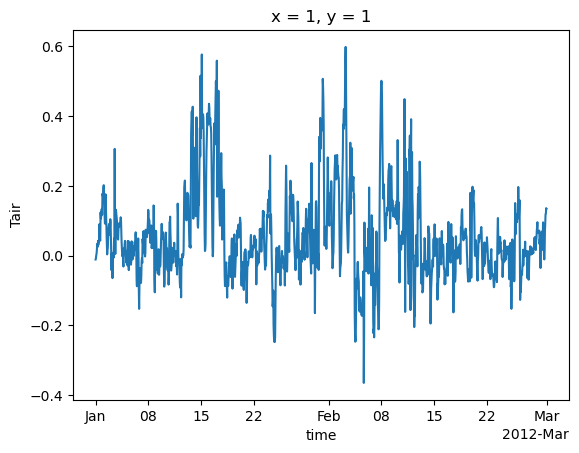

In [6]:
(cds['Tair']-arco['Tair']).plot()